In [1]:
import numpy as np
import pandas as pd

In [6]:
weather = pd.read_csv('2017.csv', index_col = 'Date')
price = pd.read_csv('Data.csv', index_col='Date', parse_dates=True)

In [13]:
price = price[(price.index > '2017-01-01') & (price.index < '2018-01-01')]
price = price[::-1]
price.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-01-03,355.75,352.00,358.50,351.50,174.70K,1.07%
2017-01-04,359.75,355.00,360.00,354.75,171.29K,1.12%
2017-01-05,361.25,359.50,362.75,358.50,194.54K,0.42%
2017-01-06,358.00,360.75,362.50,356.75,166.34K,-0.90%
2017-01-09,360.00,359.00,360.75,355.25,185.76K,0.56%


In [7]:
weather.head()

,TMAX,TMIN,PRCP,SNOW
Date,,,,
2017-01-01,4.664701,-32.340744,0.893829,1.070780
2017-01-02,8.281360,-23.992933,5.661661,3.369700
2017-01-03,9.822938,-20.340310,48.751779,6.269150
2017-01-04,-9.803922,-59.617429,18.494553,2.424837
2017-01-05,-44.915941,-69.885889,4.396777,6.210366


In [49]:
#Merge the two dataframes based on Index
final = pd.concat([price, weather],axis=1)
final = final.fillna(0)
index = final.index.values
final.head()

,Price,Open,High,Low,Vol.,Change %,TMAX,TMIN,PRCP,SNOW
Date,,,,,,,,,,
2017-01-01,0.00,0.0,0.00,0.00,0,0,4.664701,-32.340744,0.893829,1.070780
2017-01-02,0.00,0.0,0.00,0.00,0,0,8.281360,-23.992933,5.661661,3.369700
2017-01-03,355.75,352.0,358.50,351.50,174.70K,1.07%,9.822938,-20.340310,48.751779,6.269150
2017-01-04,359.75,355.0,360.00,354.75,171.29K,1.12%,-9.803922,-59.617429,18.494553,2.424837
2017-01-05,361.25,359.5,362.75,358.50,194.54K,0.42%,-44.915941,-69.885889,4.396777,6.210366


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
model = MinMaxScaler()
final = final.drop(['Vol.','Change %'], axis=1)

In [56]:
final = pd.DataFrame(model.fit_transform(final))
final.columns = ['Price', 'Open', 'High', 'Low', 'TMAX', 'TMIN','PRCP','SNOW']
final = final.set_index(index)

In [63]:
final.head()

,Price,Open,High,Low,TMAX,TMIN,PRCP,SNOW
2017-01-01,0.000000,0.000000,0.000000,0.000000,0.391782,0.399550,0.004039,0.026895
2017-01-02,0.000000,0.000000,0.000000,0.000000,0.414032,0.454095,0.025722,0.084637
2017-01-03,0.906947,0.895105,0.908745,0.906512,0.423516,0.477961,0.221686,0.157462
2017-01-04,0.917145,0.902734,0.912548,0.914894,0.302769,0.221325,0.084083,0.060905
2017-01-05,0.920969,0.914177,0.919518,0.924565,0.086755,0.154231,0.019969,0.155986


In [178]:
#Train Test Split
test = final.tail(182)
train = final.head(183)

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2017-12-07 to 2017-12-31
Data columns (total 8 columns):
Price    25 non-null float64
Open     25 non-null float64
High     25 non-null float64
Low      25 non-null float64
TMAX     25 non-null float64
TMIN     25 non-null float64
PRCP     25 non-null float64
SNOW     25 non-null float64
dtypes: float64(8)
memory usage: 1.8 KB


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2017-01-01 to 2017-12-06
Data columns (total 8 columns):
Price    340 non-null float64
Open     340 non-null float64
High     340 non-null float64
Low      340 non-null float64
TMAX     340 non-null float64
TMIN     340 non-null float64
PRCP     340 non-null float64
SNOW     340 non-null float64
dtypes: float64(8)
memory usage: 23.9 KB


In [67]:
train['Price'].head()

2017-01-01    0.000000
2017-01-02    0.000000
2017-01-03    0.906947
2017-01-04    0.917145
2017-01-05    0.920969
Name: Price, dtype: float64

In [179]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

In [181]:
model = Sequential()
model.add(Dense(18,activation='relu',input_shape=(7, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
model.fit(train.drop("Price", axis=1),train['Price'],epochs=25,batch_size=2)
predictions = model.predict(test.drop('Price', axis=1))

Epoch 1/25
183/183 [==============================] - 2s 8ms/step - loss: 0.1174 - acc: 0.1202
Epoch 2/25
183/183 [==============================] - 0s 684us/step - loss: 0.0177 - acc: 0.3169
Epoch 3/25
183/183 [==============================] - 0s 694us/step - loss: 0.0028 - acc: 0.3169
Epoch 4/25
183/183 [==============================] - 0s 742us/step - loss: 0.0010 - acc: 0.3169
Epoch 5/25
183/183 [==============================] - 0s 676us/step - loss: 5.8106e-04 - acc: 0.3169
Epoch 6/25
183/183 [==============================] - 0s 712us/step - loss: 4.1782e-04 - acc: 0.3169
Epoch 7/25
183/183 [==============================] - 0s 741us/step - loss: 3.3805e-04 - acc: 0.3169
Epoch 8/25
183/183 [==============================] - 0s 786us/step - loss: 3.0391e-04 - acc: 0.3169
Epoch 9/25
183/183 [==============================] - 0s 841us/step - loss: 2.7400e-04 - acc: 0.3169
Epoch 10/25
183/183 [==============================] - 0s 840us/step - loss: 2.5915e-04 - acc: 0.3169
Epoch 1

In [183]:
predictions
results = np.array(predictions).reshape(1,182)

In [184]:
true = test['Price'].values

In [185]:
diff = (true-results)
diff

array([[ 0.02485112, -0.00928798,  0.03431241,  0.03153754,  0.03507475,
        -0.00929806, -0.00929093,  0.05915476,  0.05900574,  0.02180058,
        -0.01437956, -0.00545985, -0.00929734, -0.00928834,  0.0178754 ,
         0.02157181,  0.03585574,  0.05973806,  0.02792491, -0.00929004,
        -0.0092797 ,  0.02393614,  0.00096619,  0.01448149,  0.01735226,
         0.01633064, -0.00929329, -0.00929168,  0.01008705, -0.00913485,
        -0.00289643, -0.0078759 ,  0.00296352, -0.00932175, -0.00931028,
         0.0125419 ,  0.00520264,  0.01217181, -0.02471691, -0.01329791,
        -0.00930735, -0.00930995, -0.00849667, -0.02598408, -0.02785121,
        -0.02273782, -0.02490906, -0.00929376, -0.009287  , -0.02009081,
        -0.03830606, -0.05538345, -0.05446971, -0.063069  , -0.00932732,
        -0.00931475, -0.06086579, -0.05942016, -0.05555253, -0.03331263,
        -0.06027469, -0.00933918, -0.00931883, -0.00929981, -0.05049095,
        -0.04426446, -0.05776018, -0.05094133, -0.0

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

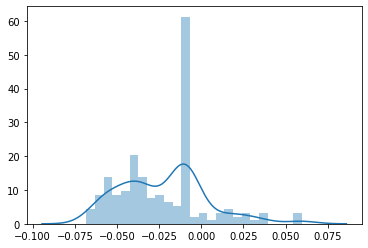

In [187]:
sns.distplot(diff, bins=25)